In [1]:
# Bibliotecas Gerais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

# TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
# Ler dados
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [3]:
## CODIGO DE TESTE ##


# Função para dividir o nome do file e extrair informações
def extract_features_from_filename(filename):
    parts = filename.split('_')

    def clean_coordinate(coordinate):
        """Remove hyphens and convert to float if possible."""
        clean_coord = coordinate.replace('-', '')
        try:
            return float(clean_coord)
        except ValueError:
            return clean_coord


    if len(parts) == 11:
        coordinates_id1 = clean_coordinate(parts[4])
        coordinates_id2 = clean_coordinate(parts[5])
        date_time_acquisition_start = parts[8].replace('T', '')
        date_time_acquisition_end = parts[9].replace('T', '')
        return pd.Series([coordinates_id1, coordinates_id2, date_time_acquisition_start, date_time_acquisition_end], 
                         index=['coordinates_id1', 'coordinates_id2', 'date_time_acquisition_start', 'date_time_acquisition_end'])

    if len(parts) == 10:
        coordinates_id1 = clean_coordinate(parts[3])
        coordinates_id2 = clean_coordinate(parts[4])
        date_time_acquisition_start = parts[7].replace('T', '')
        date_time_acquisition_end = parts[8].replace('T', '')
        return pd.Series([coordinates_id1, coordinates_id2, date_time_acquisition_start, date_time_acquisition_end], 
                         index=['coordinates_id1', 'coordinates_id2', 'date_time_acquisition_start', 'date_time_acquisition_end'])

    if len(parts) == 9:
        coordinates_id1 = clean_coordinate(parts[2])
        coordinates_id2 = clean_coordinate(parts[3])
        date_time_acquisition_start = parts[6].replace('T', '')
        date_time_acquisition_end = parts[7].replace('T', '')
        return pd.Series([coordinates_id1, coordinates_id2, date_time_acquisition_start, date_time_acquisition_end], 
                         index=['coordinates_id1', 'coordinates_id2', 'date_time_acquisition_start', 'date_time_acquisition_end'])

    if len(parts) == 8:
        coordinates_id1 = clean_coordinate(parts[1])
        coordinates_id2 = clean_coordinate(parts[2])
        date_time_acquisition_start = parts[5].replace('T', '')
        date_time_acquisition_end = parts[6].replace('T', '')
        return pd.Series([coordinates_id1, coordinates_id2, date_time_acquisition_start, date_time_acquisition_end], 
                         index=['coordinates_id1', 'coordinates_id2', 'date_time_acquisition_start', 'date_time_acquisition_end'])

    return pd.Series([None]*4, index=['coordinates_id1', 'coordinates_id2', 'date_time_acquisition_start', 'date_time_acquisition_end'])

# Aplicar a função a cada nome de arquivo no dataset
file_features = train_data['file_name_l1'].apply(extract_features_from_filename)
file_features_test = test_data['file_name_l1'].apply(extract_features_from_filename)

# Concatenar as novas features ao dataframe original

train_data = pd.concat([train_data, file_features], axis=1)
test_data = pd.concat([test_data, file_features_test], axis=1)


In [4]:

# Remover colunas 'id' e 'file_name_l1'

train_data = train_data.drop(columns=['id', 'file_name_l1'])
test_data = test_data.drop(columns=['file_name_l1'])

In [ ]:

# Estatísticas descritivas
print("Estatísticas Descritivas do Dataset de Treino:")
desc_stats = train_data.describe()
print(desc_stats.to_string())
print("\n")

# Verificar valores nulos
print("Verificar Missing Data:")
missing_data = train_data.isnull().sum()
print(missing_data.to_string())


In [ ]:
# Graficos e Visualizações

#Visualizar a distribuição normal das features
df_analise_dist = train_data.melt()

#Histograma para cada feature do DataSet
g = sns.FacetGrid(df_analise_dist, col="variable", col_wrap=4, sharex=False, sharey=False, height=4)
g.map(sns.histplot, "value", kde=False, color='blue', bins=30)
plt.show()


#Visualizar a distribuição de outliers
df_analise_box_plot = train_data.melt()

#FaceGrit com os box Plot
g = sns.FacetGrid(df_analise_box_plot, col="variable", col_wrap=4, sharex=False, sharey=False, height=4)
g.map(sns.boxplot, "value")
plt.show()
        

# Visualizações (dependendo do tipo de dados, ajuste as visualizações)
sns.pairplot(train_data)
plt.show()

In [5]:
# Traino e Validation Set´s
X = train_data.drop(columns=['value_550'])
y = train_data['value_550']

# Dividir os dados de treino completos em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=10)


# Standardizar as features dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.4284 - mae: 1.0604 - val_loss: 0.4823 - val_mae: 0.1028
Epoch 2/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4877 - mae: 0.7727 - val_loss: 0.4746 - val_mae: 0.0872
Epoch 3/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1952 - mae: 0.6518 - val_loss: 0.4745 - val_mae: 0.0956
Epoch 4/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0284 - mae: 0.5753 - val_loss: 0.4751 - val_mae: 0.1068
Epoch 5/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9422 - mae: 0.5291 - val_loss: 0.4774 - val_mae: 0.1227
Epoch 6/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8838 - mae: 0.5017 - val_loss: 0.4782 - val_mae: 0.1257
Epoch 7/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8382 - mae: 0.4721 - val_loss: 0.4812 - val_mae: 0.1369
Epoch 8/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7920 - mae: 0.4441 - val_loss: 0.4856 - val_mae: 0.1504
Epoch 9/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

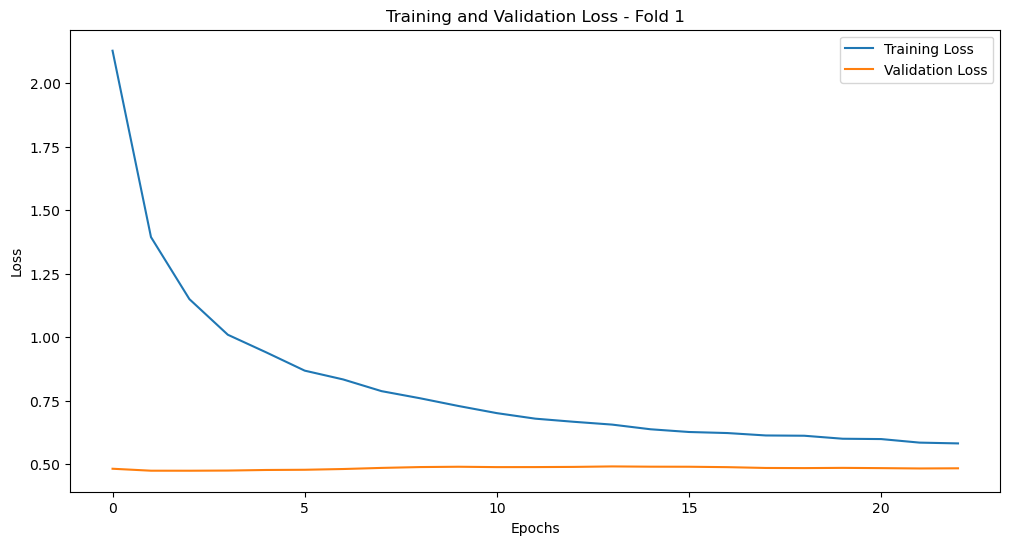

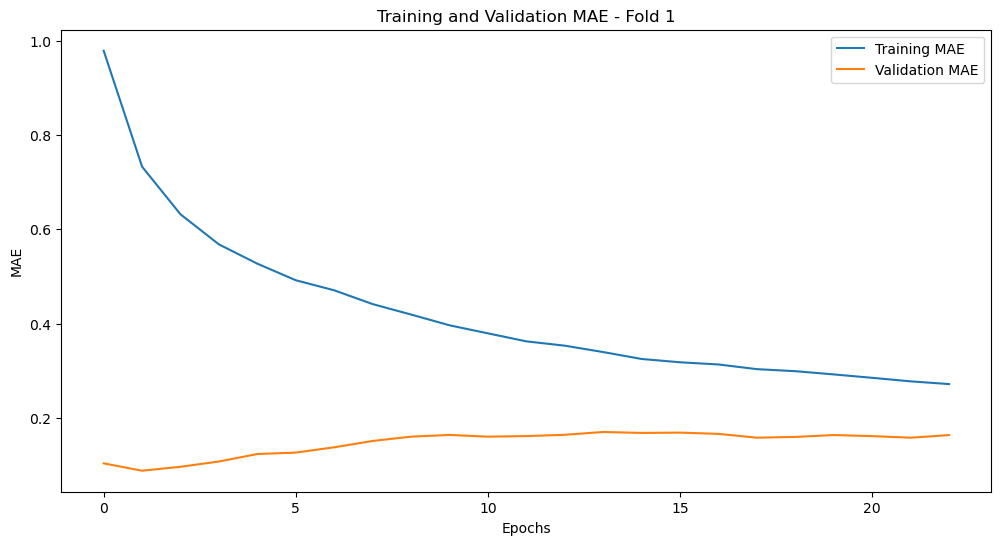

Fold Validation MAE: 0.0955568328499794
Epoch 1/550


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.1760 - mae: 0.9960 - val_loss: 0.4897 - val_mae: 0.0955
Epoch 2/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4511 - mae: 0.7680 - val_loss: 0.4846 - val_mae: 0.0952
Epoch 3/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1594 - mae: 0.6476 - val_loss: 0.4873 - val_mae: 0.1213
Epoch 4/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0718 - mae: 0.6020 - val_loss: 0.4939 - val_mae: 0.1497
Epoch 5/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9559 - mae: 0.5466 - val_loss: 0.5008 - val_mae: 0.1712
Epoch 6/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9088 - mae: 0.5186 - val_loss: 0.5055 - val_mae: 0.1846
Epoch 7/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8324 - mae: 0.4796 - val_loss: 0.5082 - val_mae: 0.1911
Epoch 8/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7878 - mae: 0.4506 - val_loss: 0.5007 - val_mae: 0.1706
Epoch 9/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7476 - mae: 0.

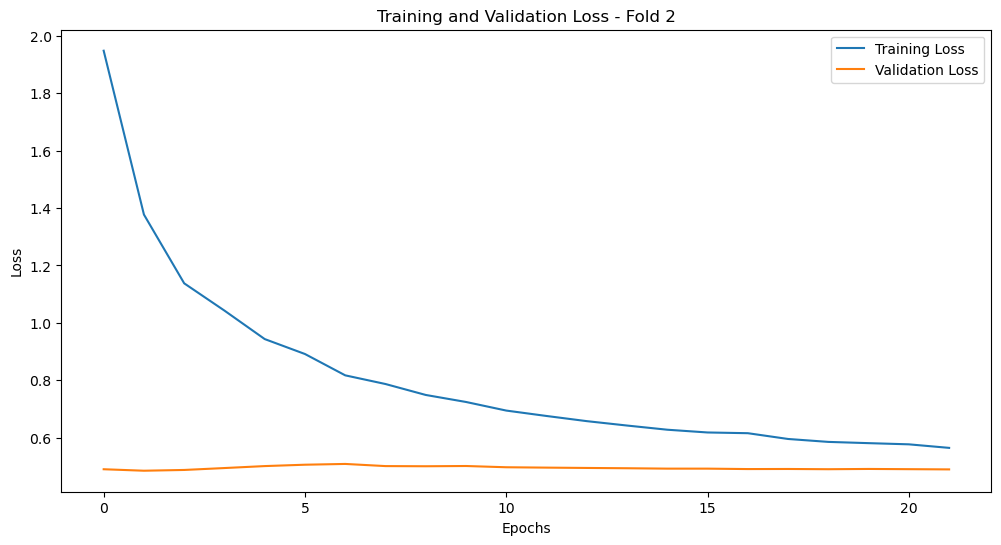

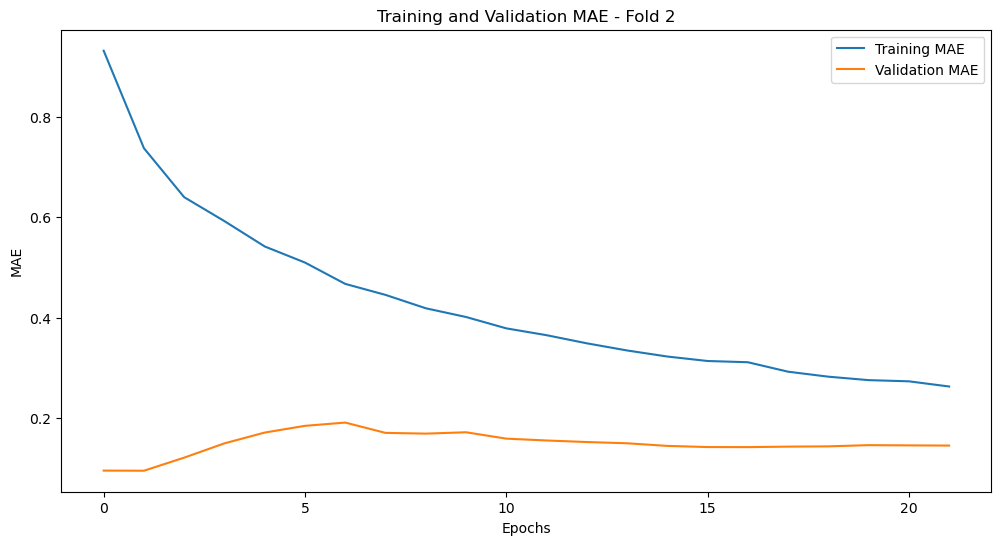

Fold Validation MAE: 0.09523768723011017
Epoch 1/550


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.1097 - mae: 0.9646 - val_loss: 0.4909 - val_mae: 0.1124
Epoch 2/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3761 - mae: 0.7255 - val_loss: 0.4860 - val_mae: 0.1000
Epoch 3/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1758 - mae: 0.6464 - val_loss: 0.4838 - val_mae: 0.0977
Epoch 4/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0333 - mae: 0.5815 - val_loss: 0.4826 - val_mae: 0.0989
Epoch 5/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9291 - mae: 0.5251 - val_loss: 0.4846 - val_mae: 0.1055
Epoch 6/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8760 - mae: 0.4969 - val_loss: 0.4851 - val_mae: 0.1097
Epoch 7/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8417 - mae: 0.4706 - val_loss: 0.4855 - val_mae: 0.1138
Epoch 8/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8007 - mae: 0.4429 - val_loss: 0.4864 - val_mae: 0.1192
Epoch 9/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7526 - mae: 0

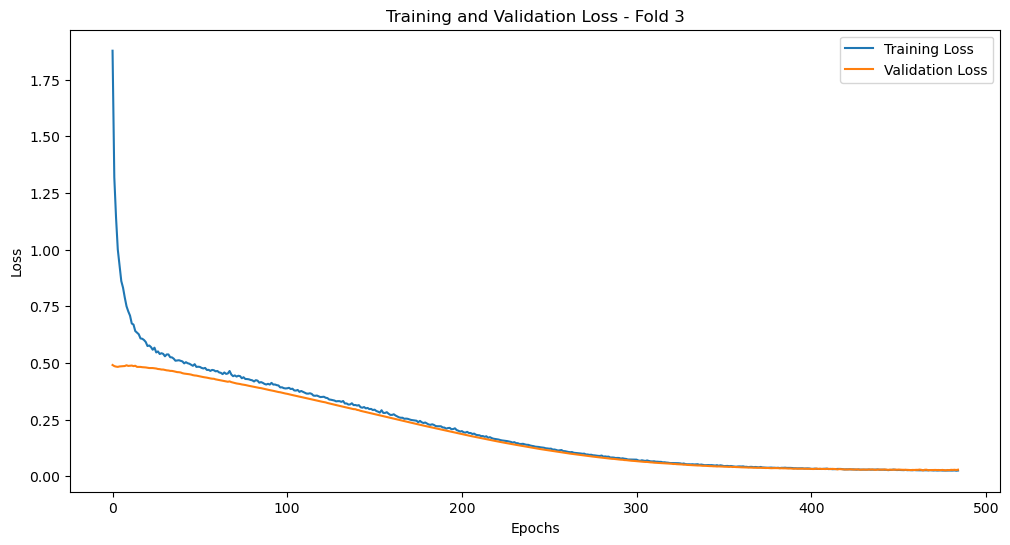

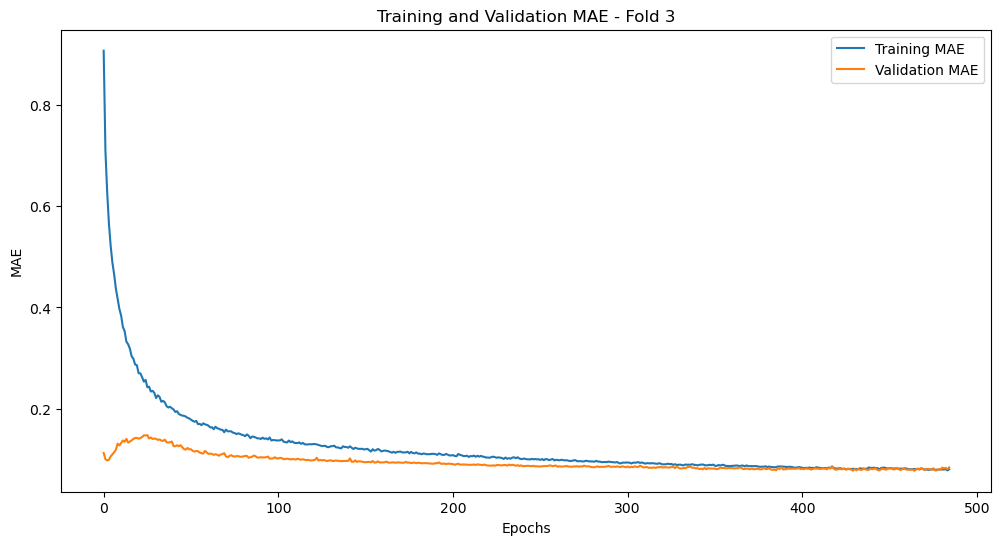

Fold Validation MAE: 0.07729242742061615
Epoch 1/550


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.9137 - mae: 1.2107 - val_loss: 0.4996 - val_mae: 0.1083
Epoch 2/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8715 - mae: 0.9204 - val_loss: 0.4973 - val_mae: 0.1118
Epoch 3/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5062 - mae: 0.7954 - val_loss: 0.4977 - val_mae: 0.1191
Epoch 4/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2964 - mae: 0.7078 - val_loss: 0.4984 - val_mae: 0.1281
Epoch 5/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1594 - mae: 0.6534 - val_loss: 0.5004 - val_mae: 0.1401
Epoch 6/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0886 - mae: 0.6179 - val_loss: 0.5023 - val_mae: 0.1480
Epoch 7/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9982 - mae: 0.5738 - val_loss: 0.5049 - val_mae: 0.1570
Epoch 8/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9355 - mae: 0.5428 - val_loss: 0.5069 - val_mae: 0.1615
Epoch 9/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8997 - mae: 0.

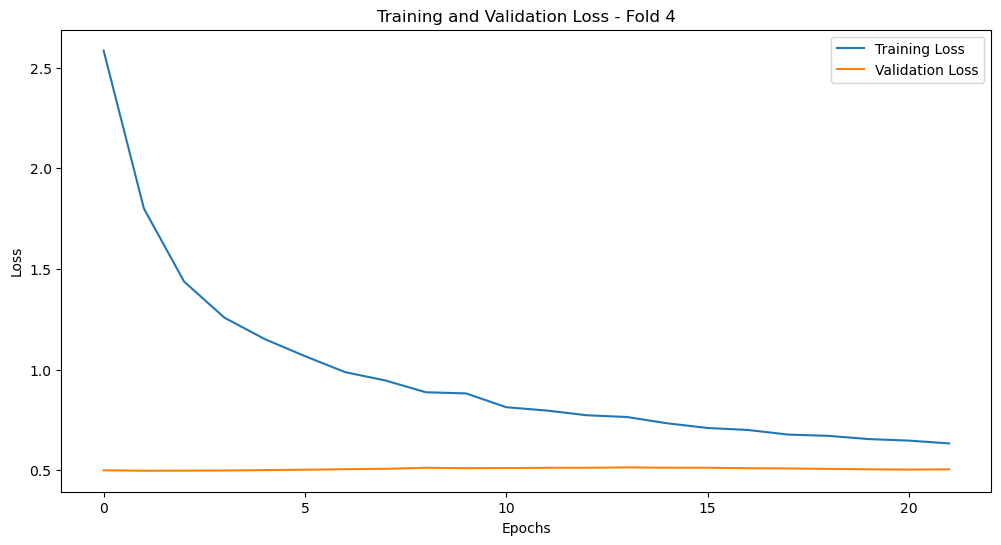

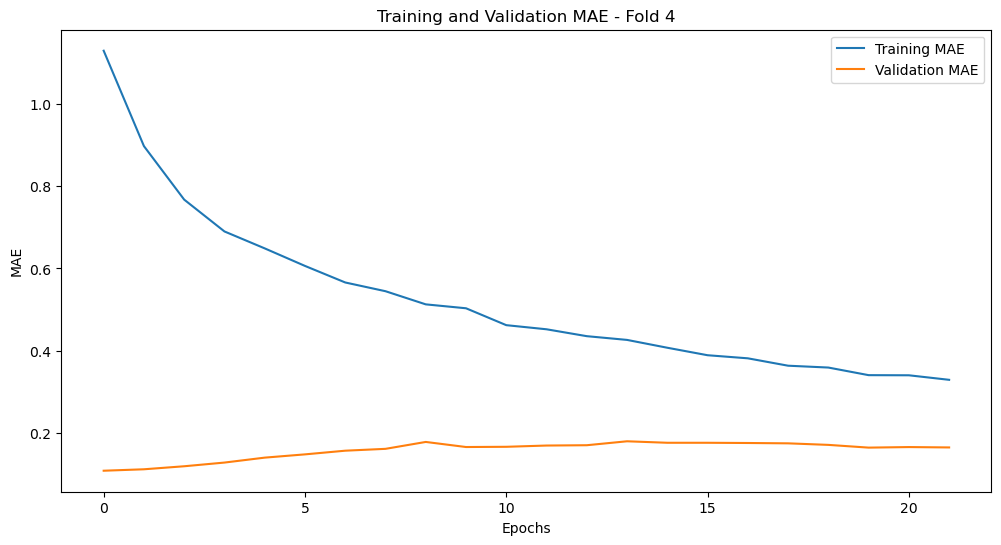

Fold Validation MAE: 0.11177842319011688
Epoch 1/550


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 2.4399 - mae: 1.0597 - val_loss: 0.4777 - val_mae: 0.0957
Epoch 2/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5215 - mae: 0.7852 - val_loss: 0.4742 - val_mae: 0.0971
Epoch 3/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2567 - mae: 0.6743 - val_loss: 0.4762 - val_mae: 0.1222
Epoch 4/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0851 - mae: 0.6007 - val_loss: 0.4808 - val_mae: 0.1409
Epoch 5/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9508 - mae: 0.5364 - val_loss: 0.4839 - val_mae: 0.1509
Epoch 6/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8886 - mae: 0.5048 - val_loss: 0.4893 - val_mae: 0.1676
Epoch 7/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8516 - mae: 0.4786 - val_loss: 0.4969 - val_mae: 0.1876
Epoch 8/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8086 - mae: 0.4491 - val_loss: 0.4975 - val_mae: 0.1870
Epoch 9/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7456 - mae: 0.

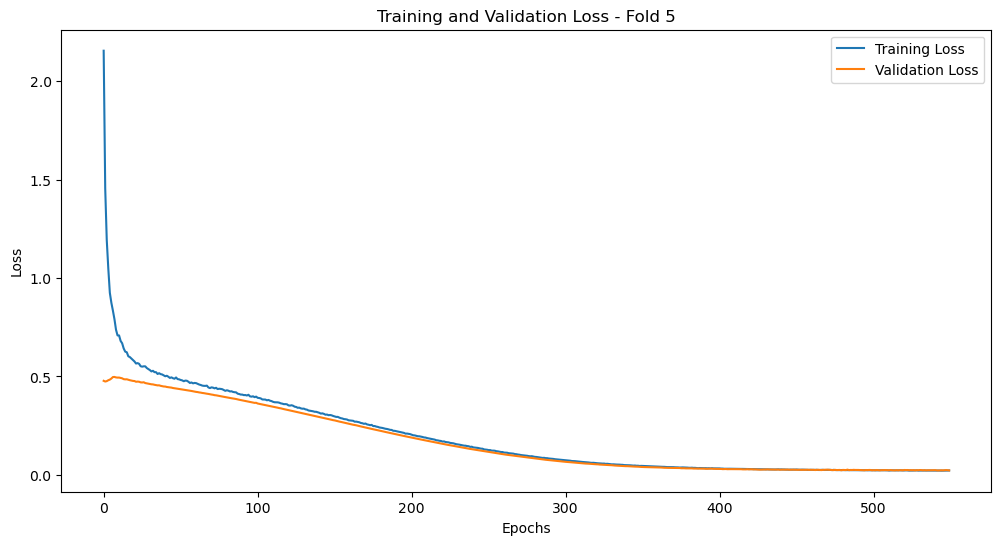

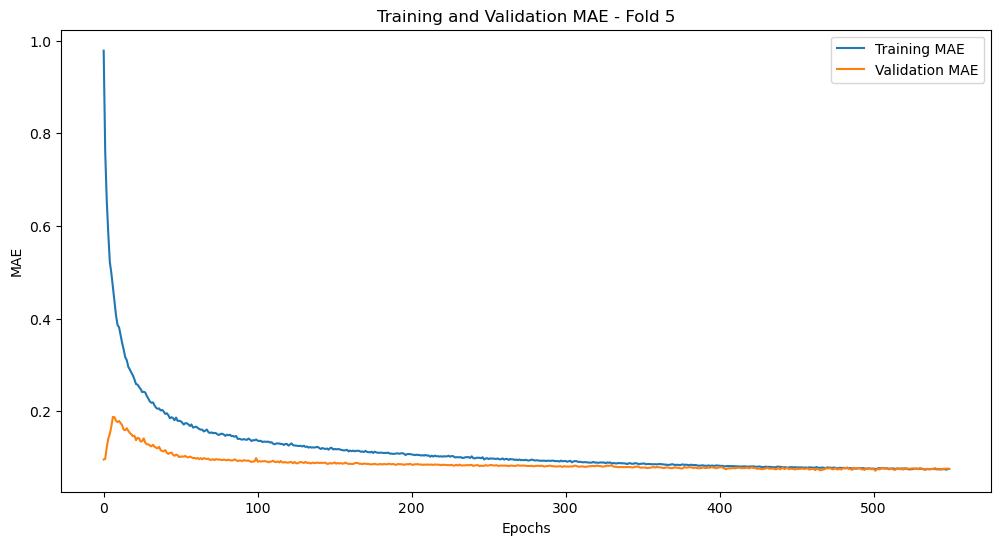

Fold Validation MAE: 0.07429085671901703
Epoch 1/550


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.4990 - mae: 1.1038 - val_loss: 0.4994 - val_mae: 0.1349
Epoch 2/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5223 - mae: 0.8000 - val_loss: 0.4891 - val_mae: 0.1035
Epoch 3/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2424 - mae: 0.6908 - val_loss: 0.4830 - val_mae: 0.0952
Epoch 4/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1024 - mae: 0.6223 - val_loss: 0.4809 - val_mae: 0.0973
Epoch 5/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9977 - mae: 0.5695 - val_loss: 0.4801 - val_mae: 0.1013
Epoch 6/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9378 - mae: 0.5372 - val_loss: 0.4802 - val_mae: 0.1095
Epoch 7/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8749 - mae: 0.4975 - val_loss: 0.4806 - val_mae: 0.1085
Epoch 8/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8115 - mae: 0.4623 - val_loss: 0.4814 - val_mae: 0.1117
Epoch 9/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8079 - mae: 0.

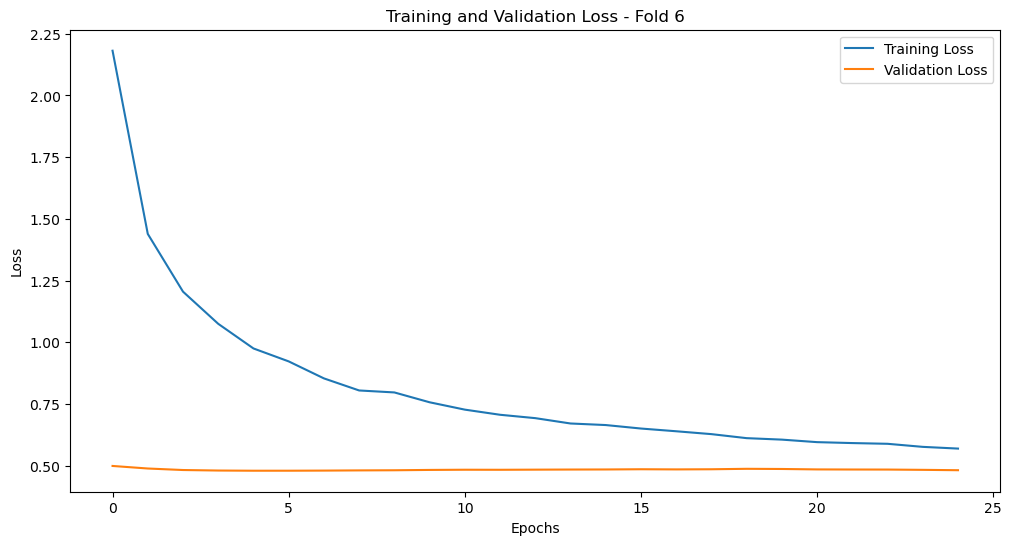

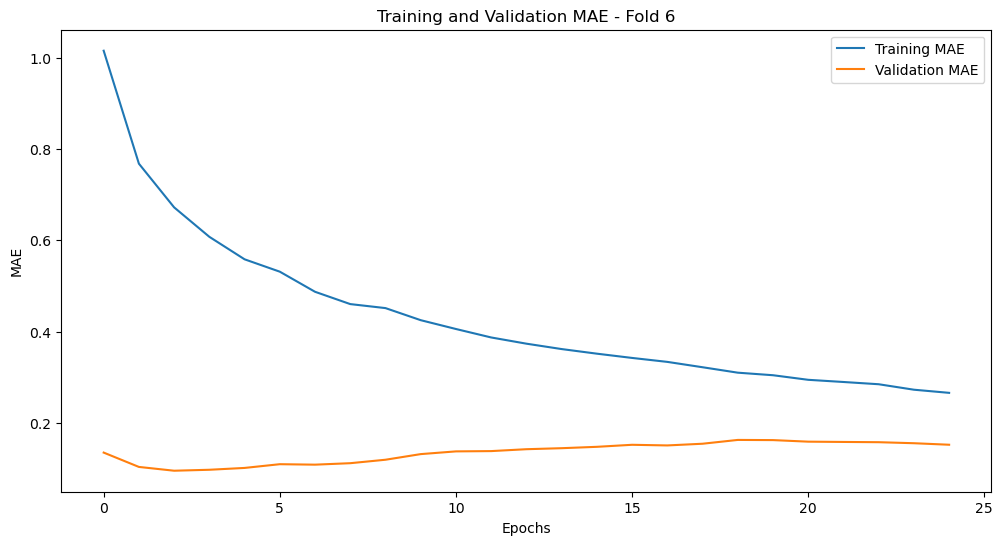

Fold Validation MAE: 0.10128951072692871
Epoch 1/550


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 2.5271 - mae: 1.0538 - val_loss: 0.4930 - val_mae: 0.1085
Epoch 2/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6066 - mae: 0.8150 - val_loss: 0.4946 - val_mae: 0.1160
Epoch 3/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2597 - mae: 0.6817 - val_loss: 0.4937 - val_mae: 0.1146
Epoch 4/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1328 - mae: 0.6317 - val_loss: 0.4937 - val_mae: 0.1158
Epoch 5/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0012 - mae: 0.5654 - val_loss: 0.4936 - val_mae: 0.1169
Epoch 6/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9329 - mae: 0.5314 - val_loss: 0.4932 - val_mae: 0.1171
Epoch 7/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8803 - mae: 0.4951 - val_loss: 0.5010 - val_mae: 0.1388
Epoch 8/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8363 - mae: 0.4678 - val_loss: 0.5014 - val_mae: 0.1402
Epoch 9/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7804 - mae: 0.

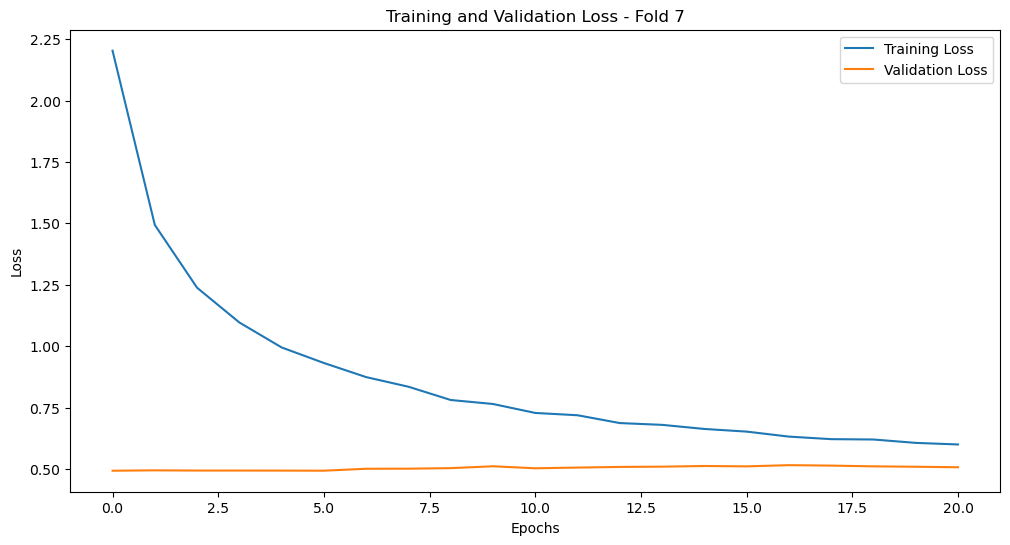

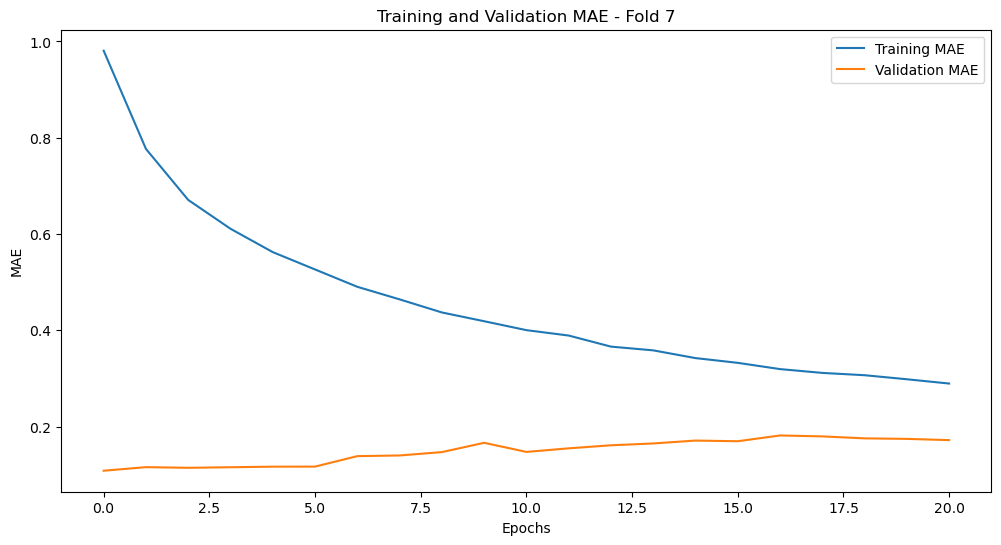

Fold Validation MAE: 0.10853303223848343
Epoch 1/550


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.2312 - mae: 1.0236 - val_loss: 0.4953 - val_mae: 0.1251
Epoch 2/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4986 - mae: 0.7820 - val_loss: 0.4950 - val_mae: 0.1237
Epoch 3/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2152 - mae: 0.6569 - val_loss: 0.4938 - val_mae: 0.1207
Epoch 4/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1136 - mae: 0.6137 - val_loss: 0.4912 - val_mae: 0.1146
Epoch 5/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9721 - mae: 0.5491 - val_loss: 0.4893 - val_mae: 0.1122
Epoch 6/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9129 - mae: 0.5140 - val_loss: 0.4870 - val_mae: 0.1100
Epoch 7/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8444 - mae: 0.4802 - val_loss: 0.4894 - val_mae: 0.1179
Epoch 8/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7919 - mae: 0.4419 - val_loss: 0.4926 - val_mae: 0.1274
Epoch 9/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7537 - mae: 0.

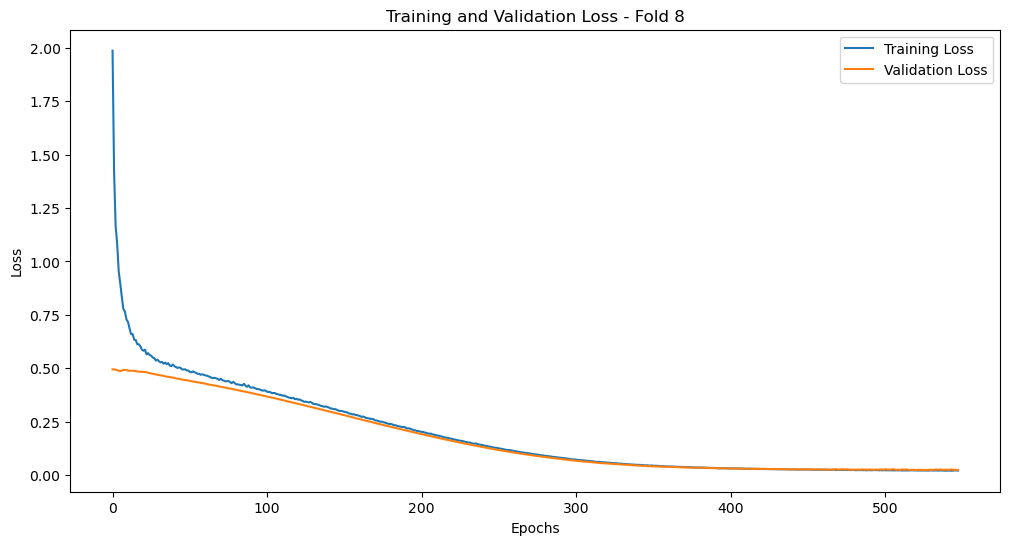

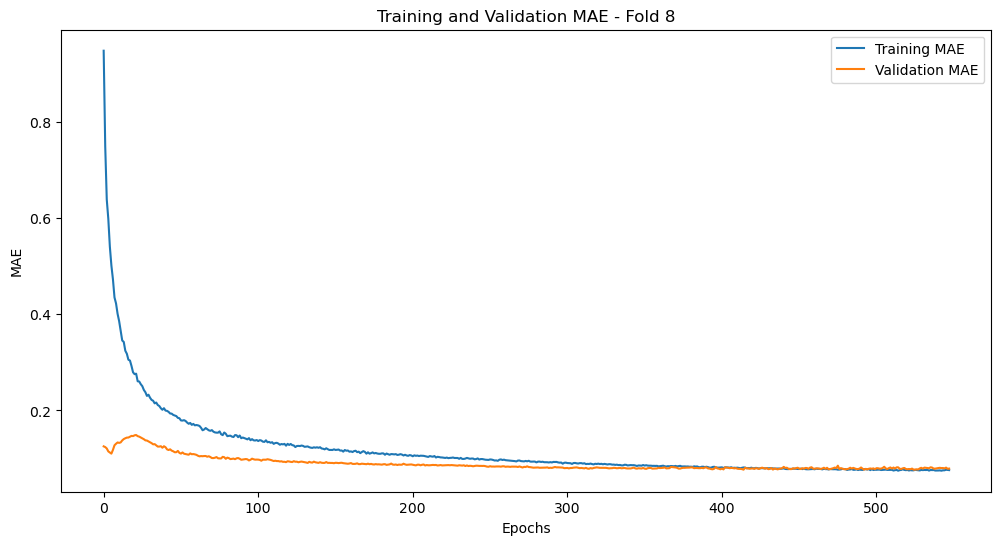

Fold Validation MAE: 0.07706879824399948
Epoch 1/550


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.8132 - mae: 0.8905 - val_loss: 0.4846 - val_mae: 0.1083
Epoch 2/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2547 - mae: 0.6777 - val_loss: 0.4846 - val_mae: 0.1101
Epoch 3/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0406 - mae: 0.5848 - val_loss: 0.4844 - val_mae: 0.1114
Epoch 4/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9257 - mae: 0.5252 - val_loss: 0.4835 - val_mae: 0.1103
Epoch 5/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8546 - mae: 0.4762 - val_loss: 0.4809 - val_mae: 0.1044
Epoch 6/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7958 - mae: 0.4438 - val_loss: 0.4801 - val_mae: 0.1047
Epoch 7/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7633 - mae: 0.4189 - val_loss: 0.4754 - val_mae: 0.0974
Epoch 8/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7301 - mae: 0.3971 - val_loss: 0.4757 - val_mae: 0.1001
Epoch 9/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7040 - mae: 0

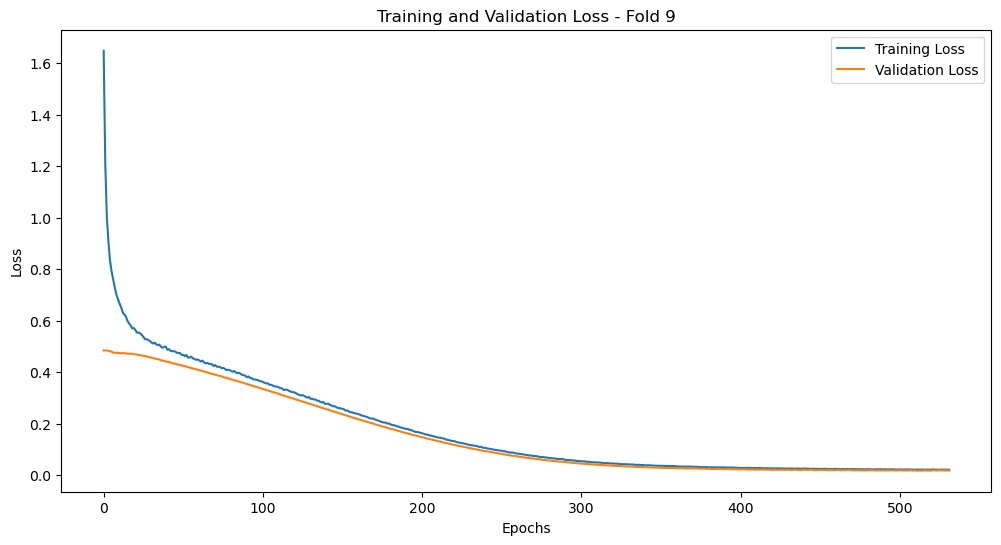

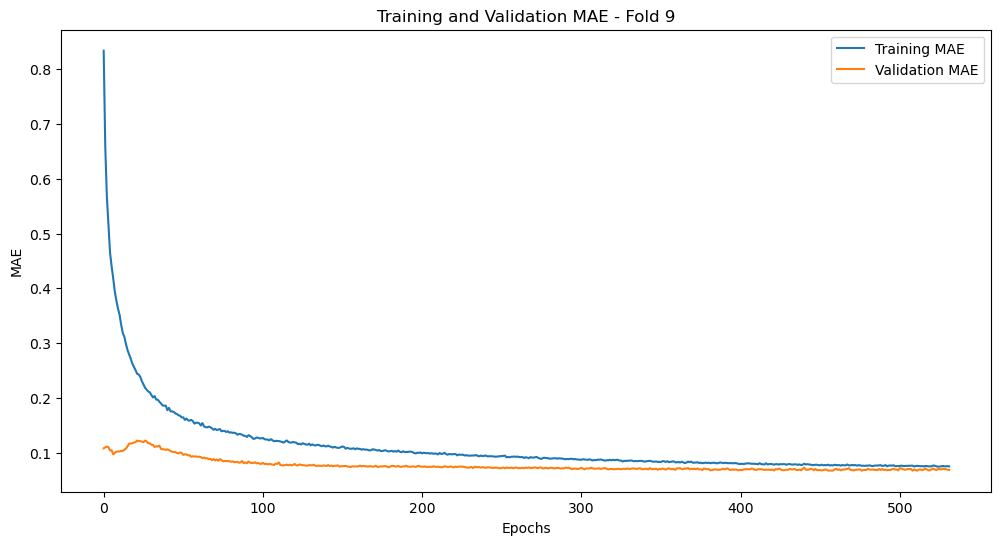

Fold Validation MAE: 0.06773750483989716
Epoch 1/550


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.0691 - mae: 0.9596 - val_loss: 0.4874 - val_mae: 0.1099
Epoch 2/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4168 - mae: 0.7532 - val_loss: 0.4839 - val_mae: 0.1093
Epoch 3/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1118 - mae: 0.6294 - val_loss: 0.4810 - val_mae: 0.1138
Epoch 4/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0104 - mae: 0.5765 - val_loss: 0.4815 - val_mae: 0.1184
Epoch 5/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9223 - mae: 0.5264 - val_loss: 0.4828 - val_mae: 0.1172
Epoch 6/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8539 - mae: 0.4865 - val_loss: 0.4824 - val_mae: 0.1212
Epoch 7/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8053 - mae: 0.4617 - val_loss: 0.4823 - val_mae: 0.1260
Epoch 8/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7738 - mae: 0.4399 - val_loss: 0.4815 - val_mae: 0.1168
Epoch 9/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7570 - mae: 0.

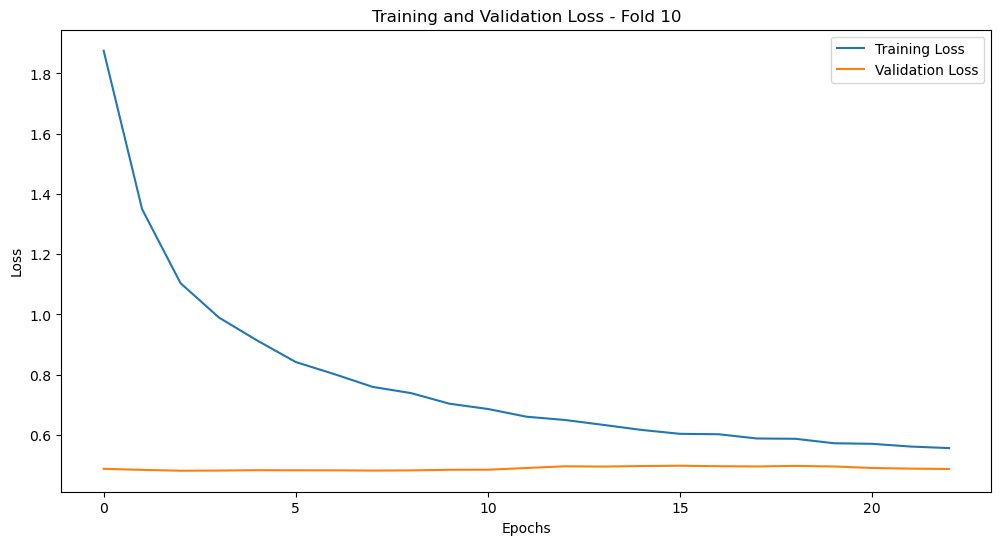

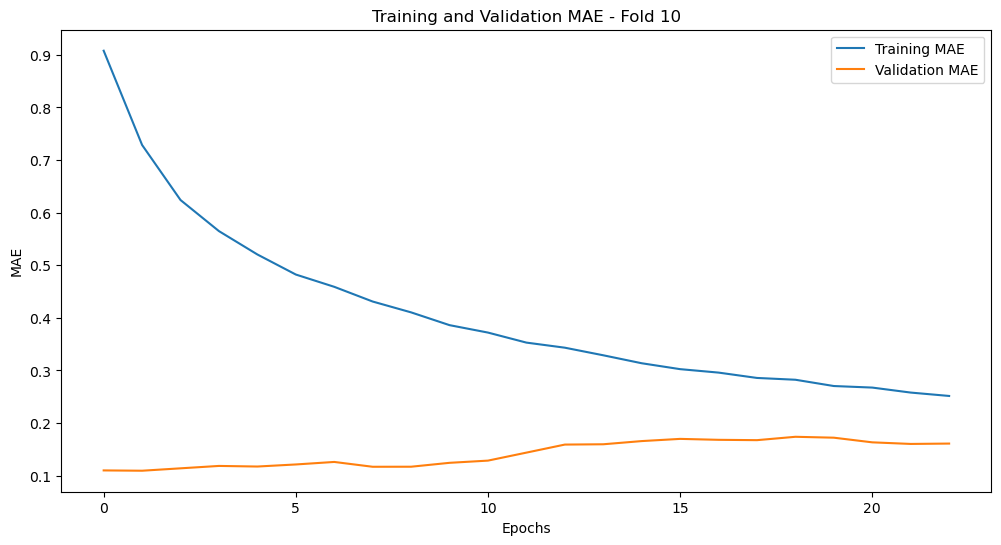

Fold Validation MAE: 0.11383190006017685

Mean Validation MAE: 0.09226169735193253
Standard Deviation of Validation MAE: 0.016097946379425607


In [8]:
# Criação do modelo

def create_model():
    model = Sequential([
        Dense(200, activation=LeakyReLU(negative_slope=0.01), kernel_regularizer=l1(0.0001), input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(100, activation=LeakyReLU(negative_slope=0.01), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.256),
        Dense(100, activation=LeakyReLU(negative_slope=0.01), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.156),
        Dense(100, activation=LeakyReLU(negative_slope=0.01), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.125),
        Dense(100, activation=LeakyReLU(negative_slope=0.01), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.072),
        Dense(50, activation='relu'),
        BatchNormalization(),
        Dropout(0.025),
        Dense(1) 
    ])


    optimizer = Adam(learning_rate=0.0003)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=10)


val_mae_scores = []

# Loop para cada fold
for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


    model = create_model()

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    # Trainar o modelo
    history = model.fit(X_train_fold, y_train_fold, epochs=550, batch_size=512, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping], verbose=1)

    # Plotting do training and validation loss para cada fold
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss - Fold {len(val_mae_scores) + 1}')
    plt.legend()
    plt.show()

    # Plotting do training and validation MAE para cada fold
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title(f'Training and Validation MAE - Fold {len(val_mae_scores) + 1}')
    plt.legend()
    plt.show()

    # Avaliar o modelo no conjunto de validação
    val_loss, val_mae = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    val_mae_scores.append(val_mae)
    print(f"Fold Validation MAE: {val_mae}")

# Calcular a média e desvio padrão dos scores de validação
mean_val_mae = np.mean(val_mae_scores)
std_val_mae = np.std(val_mae_scores)

print(f"\nMean Validation MAE: {mean_val_mae}")
print(f"Standard Deviation of Validation MAE: {std_val_mae}")


In [ ]:
# Plot dos scores de loss e MAE

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Standardizar os dados de teste para fazer previsões
test_data_scaled = scaler.transform(test_data.drop(columns=['id']))


In [ ]:
# Gerar prediçoes
predictions = model.predict(test_data_scaled)

# Preparar submisao em csv
submission = pd.DataFrame({
    'id': test_data['id'],
    'value_550': predictions.flatten()
})


submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")


In [ ]:
## CODIGO DE TESTE ##

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np


## CODIGO DE TESTE ##

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the function to create your Keras model
def create_model(optimizer='adam', 
                 kernel_regularizer_1=0.0001, 
                 kernel_regularizer_2=0.001, 
                 kernel_regularizer_3=0.01, 
                 dropout_rate_1=0.5, 
                 dropout_rate_2=0.5, 
                 dropout_rate_3=0.2):
    model = Sequential([
        Dense(1280, activation='relu', kernel_regularizer=l2(kernel_regularizer_1), input_shape=(X_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate_1),
        Dense(640, activation='relu', kernel_regularizer=l2(kernel_regularizer_2)),
        BatchNormalization(),
        Dropout(dropout_rate_2),
        Dense(320, activation='relu', kernel_regularizer=l2(kernel_regularizer_3)),
        BatchNormalization(),
        Dropout(dropout_rate_3),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

# Create a KerasRegressor based on your Keras model
model = KerasRegressor(model=create_model, epochs=300, batch_size=32, verbose=0)

# Define the grid search parameters with correct prefixes
param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__kernel_regularizer_1': [0.0001, 0.001, 0.01],
    'model__kernel_regularizer_2': [0.0001, 0.001, 0.01],
    'model__kernel_regularizer_3': [0.0001, 0.001, 0.01],
    'model__dropout_rate_1': [0.3, 0.5, 0.7],
    'model__dropout_rate_2': [0.3, 0.5, 0.7],
    'model__dropout_rate_3': [0.2, 0.4, 0.6]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV
grid_result = grid_search.fit(X_scaled, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
